In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns
gene_names = Y.columns

# List of columns for iterating
columns = list(Y)

In [2]:
# preprocessing
from skbio.stats.composition import clr
from sklearn.metrics import euclidean_distances

# Imputation
Y = Y.replace(to_replace=0, value=0.000001)

# Center log ratio
Y_clr = clr(Y)

# Transformation 
Y_euc = euclidean_distances(Y_clr)

In [3]:
# scaling the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# applying pca algorithm
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y_euc)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.64634162 0.09502738]
Cumulative: [0.64634162 0.741369  ]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

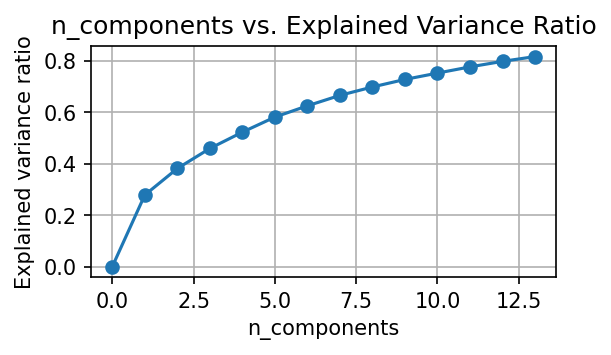

In [12]:
# OBSOLETE
nums = np.arange(14)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(Y_clr)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [8]:
principal_components = pca.components_
for p in range(len(principal_components)):
    print(principal_components[p])
    print(len(principal_components[p]))

[ 0.09841464  0.05840334  0.13252187 -0.0197884  -0.02065189  0.0848394
  0.10321925  0.09191369  0.01698929  0.03555415  0.00818933  0.01810164
  0.00265536  0.11818168  0.09371069  0.11056901  0.12843153 -0.01923281
  0.11227862  0.09681531  0.08148218  0.06824444  0.09444859 -0.0032269
  0.03615875 -0.05381954 -0.0568957   0.01022893 -0.05970745 -0.04353638
 -0.04279586 -0.03962105 -0.04872225 -0.02403279 -0.04495267 -0.04004374
 -0.01305603  0.00292832 -0.0132207   0.05356448  0.05789236 -0.0360019
 -0.0120642  -0.01713928  0.06467133 -0.02808207 -0.02706213 -0.044926
  0.08477187  0.12597984  0.12303624 -0.03540906  0.05475744  0.11919793
  0.08032155  0.10992328  0.10551106  0.09653209  0.1110587   0.06728433
 -0.00385265  0.10278417  0.059125    0.09594508  0.10464522  0.1183852
  0.10942842 -0.01008734  0.10339023  0.08570329  0.11214584  0.11084969
  0.10303332  0.11106968  0.08742576  0.1078542   0.11305323  0.08510101
  0.03552703  0.09515071 -0.00096971  0.10425875  0.02559

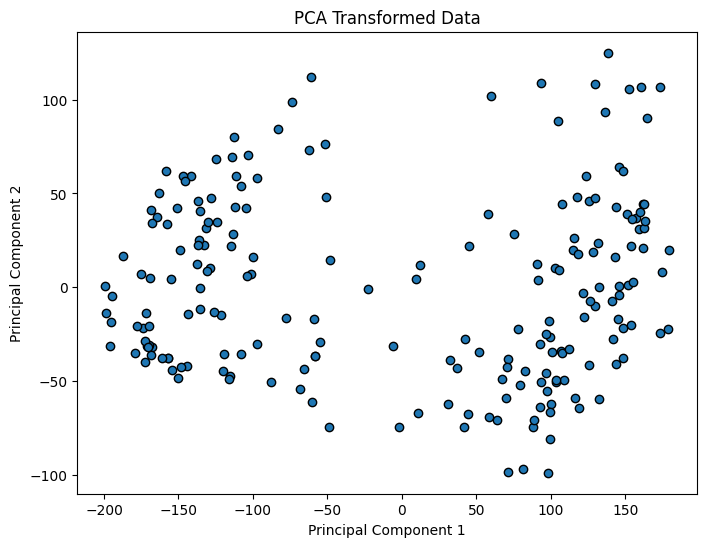

In [6]:
# Visualization
'''
plt.figure(figsize=(8,6))
plt.scatter(Y_clr[:, 0], Y_clr[:, 1], edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.show()
'''
fig, ax = plt.subplots(figsize=(8,6))
scatter = plt.scatter(Y_pca[:, 0], Y_pca[:, 1], edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
'''
legend = ax.legend(
    labels=X['Sequencer'].tolist(), # WHY
    loc="upper right",
    title="Sequencers",
)
#ax.add_artist(legend)
'''
plt.show()

In [21]:
print(X['Sequencer'])

0      1
1      1
2      1
3      1
4      1
      ..
199    7
200    3
201    2
202    7
203    4
Name: Sequencer, Length: 204, dtype: int64
